In [77]:
# here we r having 30 keypoints of faces in dataset and their corresponding grayscale images 
# 96 * 96,
# data is in csv file where image and cordinates of feature r there, 
# we ll train our cnn to detect these points
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
# first we ll process cdv data, training and test
from sklearn.utils import shuffle
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential

In [122]:
path = os.path.abspath('face_keypoint_dataset')
trainPath = os.path.join(path, 'training.csv')
testPath = os.path.join(path, 'test.csv')

In [123]:
dfTrain = pd.read_csv(trainPath)
dfTest = pd.read_csv(testPath)

In [124]:
# now the image column is having values of pixels in a string format for each row
# first we ll do it for train, and then for can b done for test

# we ll convert the string to numpy array, the values are separated by 'space' 
dfTrain['Image'] = dfTrain['Image'].apply(lambda img: np.fromstring(img, sep = ' ', dtype = np.float32)) 
dfTrain['Image']


0       [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1       [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
2       [144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184...
3       [193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 193...
4       [147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 216...
5       [167.0, 169.0, 170.0, 167.0, 156.0, 145.0, 106...
6       [109.0, 109.0, 125.0, 141.0, 145.0, 139.0, 120...
7       [178.0, 177.0, 178.0, 179.0, 179.0, 179.0, 181...
8       [164.0, 158.0, 118.0, 76.0, 66.0, 69.0, 59.0, ...
9       [226.0, 227.0, 225.0, 224.0, 221.0, 220.0, 215...
10      [52.0, 51.0, 54.0, 57.0, 57.0, 56.0, 55.0, 55....
11      [142.0, 124.0, 123.0, 133.0, 140.0, 147.0, 151...
12      [86.0, 93.0, 106.0, 114.0, 112.0, 110.0, 111.0...
13      [75.0, 65.0, 63.0, 75.0, 70.0, 78.0, 84.0, 97....
14      [119.0, 106.0, 101.0, 106.0, 89.0, 66.0, 67.0,...
15      [52.0, 54.0, 74.0, 76.0, 55.0, 48.0, 47.0, 41....
16      [201.0, 200.0, 202.0, 193.0, 124.0, 59.0, 53.0...
17      [202.0

In [125]:
dfTrain.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [126]:
# since all of the 7k images r not having labels for all 30 keypoints, only 2k are having
# so initially we ll go with those 2k images which r hving full 30 points
dfTrain = dfTrain.dropna()
dfTrain.count()

left_eye_center_x            2140
left_eye_center_y            2140
right_eye_center_x           2140
right_eye_center_y           2140
left_eye_inner_corner_x      2140
left_eye_inner_corner_y      2140
left_eye_outer_corner_x      2140
left_eye_outer_corner_y      2140
right_eye_inner_corner_x     2140
right_eye_inner_corner_y     2140
right_eye_outer_corner_x     2140
right_eye_outer_corner_y     2140
left_eyebrow_inner_end_x     2140
left_eyebrow_inner_end_y     2140
left_eyebrow_outer_end_x     2140
left_eyebrow_outer_end_y     2140
right_eyebrow_inner_end_x    2140
right_eyebrow_inner_end_y    2140
right_eyebrow_outer_end_x    2140
right_eyebrow_outer_end_y    2140
nose_tip_x                   2140
nose_tip_y                   2140
mouth_left_corner_x          2140
mouth_left_corner_y          2140
mouth_right_corner_x         2140
mouth_right_corner_y         2140
mouth_center_top_lip_x       2140
mouth_center_top_lip_y       2140
mouth_center_bottom_lip_x    2140
mouth_center_b

In [127]:
# now we ll create numpy array of xTrain dataset,
# shape need to be (2140, 96, 96) as channel is one

xt = np.vstack(dfTrain['Image'])
# this will vertically join the image column
# this will give (2140, 9216) as 96*96 = 9216
xt = xt / 255 # normalization
# now we ll reshape in (2140, 96, 96)
x = []

for image in xt:
    imgMat = image.reshape(96, 96, 1)
    x.append(imgMat)
x = np.array(x)
x.shape

(2140, 96, 96, 1)

In [128]:
# y will only be for train
# y will be the array of values of all columns but the last column which is the image
y = dfTrain[ dfTrain.columns[:-1] ].values
# thus y is of the shape (2140, 30)
# 30 cordinate of keypoint for all 2140 images

y = (y - 48) / 48
# normalizing y data to (-1, 1)
y = y.astype(np.float32)
y.shape

(2140, 30)

In [129]:
# now we ll shuffle the training data

x, y = shuffle(x, y, random_state = 42)

In [130]:
# similarly we process test data, just test is not having y

dfTest['Image'] = dfTest['Image'].apply(lambda img: np.fromstring(img, sep = ' ', dtype = np.float32))
dfTest = dfTest.dropna()
dfTest.count()

ImageId    1783
Image      1783
dtype: int64

In [131]:
dfTest['Image']

0       [182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176...
1       [76.0, 87.0, 81.0, 72.0, 65.0, 59.0, 64.0, 76....
2       [177.0, 176.0, 174.0, 170.0, 169.0, 169.0, 168...
3       [176.0, 174.0, 174.0, 175.0, 174.0, 174.0, 176...
4       [50.0, 47.0, 44.0, 101.0, 144.0, 149.0, 120.0,...
5       [177.0, 177.0, 177.0, 171.0, 142.0, 115.0, 97....
6       [77.0, 55.0, 44.0, 56.0, 58.0, 61.0, 67.0, 66....
7       [156.0, 160.0, 162.0, 166.0, 150.0, 114.0, 97....
8       [230.0, 230.0, 231.0, 231.0, 231.0, 231.0, 231...
9       [132.0, 129.0, 126.0, 128.0, 146.0, 163.0, 170...
10      [182.0, 182.0, 182.0, 182.0, 182.0, 181.0, 183...
11      [207.0, 205.0, 204.0, 202.0, 205.0, 197.0, 184...
12      [121.0, 83.0, 58.0, 41.0, 37.0, 36.0, 33.0, 33...
13      [89.0, 60.0, 63.0, 65.0, 65.0, 84.0, 64.0, 35....
14      [88.0, 112.0, 132.0, 132.0, 133.0, 135.0, 131....
15      [153.0, 153.0, 155.0, 156.0, 155.0, 154.0, 153...
16      [97.0, 101.0, 98.0, 92.0, 91.0, 91.0, 95.0, 99...
17      [253.0

In [132]:
xT = np.vstack(dfTest['Image'])
# this will vertically join the image column
# this will give (2140, 9216) as 96*96 = 9216
xT = xT / 255 # normalization
xT.shape
# here we see we have 1783 images for test

# now similarly we ll reshape
xTest = []

for image in xT:
    imgMat = image.reshape(96, 96, 1)
    xTest.append(imgMat)
xTest = np.array(xTest)
xTest.shape

(1783, 96, 96, 1)

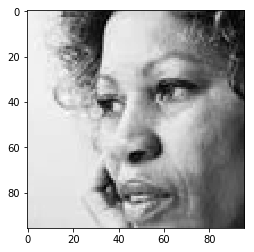

In [134]:
# now lets see our images
imgNo = 369
xPlot = x[imgNo].reshape(96, 96)
plt.imshow(xPlot, cmap = 'gray')
plt.show()

In [135]:
# now we will define the hyperparameters for our model

batchSize = 128

#epochs = 3000

imgRows = 96
imgCols = 96
# we wont define no. of classes as this is not classification

filters = 32
filterSize = (3, 3)
poolSize = (2, 2)

In [142]:
# now we ll build the model
model = Sequential()
model.add(Convolution2D(filters = 32, kernel_size = filterSize, 
                       input_shape = (imgRows, imgCols, 1), padding = 'valid' ))
# we have to give shape to first cnn layer for keras,
# here channel is 1 so 3rd dimension is 1
convOut1 = Activation('relu')
model.add(convOut1)

model.add(MaxPooling2D(pool_size = poolSize))

model.add(Dropout(0.5))

model.add(Convolution2D(filters = 64, kernel_size = filterSize))
convOut2 = Activation('relu')
model.add(convOut2)


model.add(MaxPooling2D(pool_size = poolSize))

model.add(Dropout(0.5))


model.add(Convolution2D(filters = 128, kernel_size = filterSize))
convOut2 = Activation('relu')
model.add(convOut2)

model.add(MaxPooling2D(pool_size = poolSize))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500))
convOut3 = Activation('relu')

model.add(Dropout(0.5))

model.add(Dense(500))
convOut4 = Activation('relu')

model.add(Dense(30))


In [145]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [146]:
epochs = 500
for i in range(6):
    model.fit(x, y, batch_size = batchSize, epochs = epochs, verbose = 1)
    model.save('CNN_face_keypoint' + str((epochs * i + 500)) + '.h5')

Epoch 1/500
2140/2140 [==============================] - 58s - loss: 1.4019    
Epoch 2/500
2140/2140 [==============================] - 52s - loss: 0.0254    
Epoch 3/500
2140/2140 [==============================] - 52s - loss: 0.0136    
Epoch 4/500
2140/2140 [==============================] - 51s - loss: 0.0106    
Epoch 5/500
2140/2140 [==============================] - 54s - loss: 0.0092    
Epoch 6/500
2140/2140 [==============================] - 54s - loss: 0.0086    
Epoch 7/500
2140/2140 [==============================] - 52s - loss: 0.0083    
Epoch 8/500
2140/2140 [==============================] - 53s - loss: 0.0080    
Epoch 9/500
2140/2140 [==============================] - 53s - loss: 0.0077    
Epoch 10/500
2140/2140 [==============================] - 52s - loss: 0.0074    
Epoch 11/500
2140/2140 [==============================] - 54s - loss: 0.0073    
Epoch 12/500
2140/2140 [==============================] - 52s - loss: 0.0070    
Epoch 13/500
2140/2140 [=============

KeyboardInterrupt: 